# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#test example to check format
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()

print(response)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 6.25, 'feels_like': -0.91, 'temp_min': 5, 'temp_max': 7.22, 'pressure': 1012, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 240}, 'clouds': {'all': 24}, 'dt': 1584049733, 'sys': {'type': 1, 'id': 1412, 'country': 'GB', 'sunrise': 1583994043, 'sunset': 1584035988}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

cityApi = []
cloudinessApi = []
countryApi = []
dateApi = []
humidityApi = []
latApi = []
lngApi = []
maxTempApi = []
windSpeedApi = [] 
RECORD = 0

print("Beginning Data Retrieval")  
print("-----------------------------")

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for CT in cities:
 
    try:
        response = requests.get(query_url + CT).json()
        cityApi.append(response["name"])
        cloudinessApi.append(response["clouds"]["all"])
        countryApi.append(response["sys"]["country"])
        dateApi.append(response["dt"])
        humidityApi.append(response["main"]["humidity"])
        latApi.append(response["coord"]["lat"])
        lngApi.append(response["coord"]["lon"])
        maxTempApi.append(response["main"]["temp_max"])
        windSpeedApi.append(response["wind"]["speed"])
        RECORD = RECORD +1
        cityName = response["name"]
        cityID = response["id"]
        print(f"Checked {cityName}, city id {cityID}, record count {RECORD}")
        
    except Exception as exc:
        print(f"City not found")
        
    
    time.sleep(1)


Beginning Data Retrieval
-----------------------------
Checked Breves, city id 3404817, record count 1
Checked Vila Velha, city id 3445026, record count 2
Checked Mahébourg, city id 934322, record count 3
Checked Bredasdorp, city id 1015776, record count 4
City not found
Checked Mataura, city id 6201424, record count 5
Checked Kapaa, city id 5848280, record count 6
Checked Hong Kong, city id 1819729, record count 7
Checked Porbandar, city id 1259395, record count 8
Checked Arraial do Cabo, city id 3471451, record count 9
Checked Albany, city id 5106841, record count 10
Checked Inuvik, city id 5983607, record count 11
City not found
Checked Husavik, city id 2629833, record count 12
Checked Bethel, city id 5282297, record count 13
Checked Yeppoon, city id 2142316, record count 14
Checked Cape Town, city id 3369157, record count 15
Checked Deep River, city id 5937073, record count 16
Checked Jamestown, city id 5122534, record count 17
Checked Hobart, city id 2163355, record count 18
Check

Checked Chihuahua, city id 4014336, record count 153
Checked Vung Tau, city id 1562414, record count 154
Checked Koindu, city id 2409751, record count 155
Checked Batemans Bay, city id 2176639, record count 156
Checked Turbat, city id 1163054, record count 157
Checked Araouane, city id 2460954, record count 158
Checked Yashkul', city id 468747, record count 159
Checked Paamiut, city id 3421193, record count 160
Checked Yurgamysh, city id 1485721, record count 161
Checked Umm Kaddadah, city id 364933, record count 162
Checked Yangi Marg`ilon, city id 1513491, record count 163
Checked Thohoyandou, city id 949224, record count 164
Checked Egvekinot, city id 4031742, record count 165
Checked Lafia, city id 2332515, record count 166
Checked Narasannapeta, city id 1261853, record count 167
Checked Vostok, city id 2013279, record count 168
Checked Saint-Philippe, city id 935215, record count 169
Checked Parabel', city id 1495586, record count 170
Checked Faanui, city id 4034551, record count 

Checked Kochevo, city id 546845, record count 308
Checked Elizabeth City, city id 4465088, record count 309
Checked Sola, city id 2134814, record count 310
Checked Port Hedland, city id 2063042, record count 311
City not found
Checked Cap-aux-Meules, city id 5915327, record count 312
Checked Comodoro Rivadavia, city id 3860443, record count 313
Checked Half Moon Bay, city id 5354943, record count 314
Checked Rio Negrinho, city id 3451124, record count 315
Checked Portland, city id 5746545, record count 316
Checked Santa Rosa, city id 1687894, record count 317
Checked Dikson, city id 1507390, record count 318
Checked Alvorada, city id 3472404, record count 319
Checked Huaihua, city id 1807689, record count 320
City not found
Checked Talara, city id 3691582, record count 321
City not found
Checked Anadyr, city id 2127202, record count 322
Checked Geraldton, city id 2070998, record count 323
Checked Nieuw Nickerie, city id 3383427, record count 324
Checked Sinjai, city id 1626895, record 

Checked Agirish, city id 1512101, record count 459
Checked Shudayag, city id 493600, record count 460
Checked Gweta, city id 933734, record count 461
Checked Semnan, city id 116402, record count 462
City not found
Checked Okhotsk, city id 2122605, record count 463
Checked Labuhan, city id 8079926, record count 464
Checked Balkhash, city id 1525798, record count 465
Checked Aksay, city id 583673, record count 466
Checked Baykit, city id 1510689, record count 467
Checked Tornio, city id 634093, record count 468
Checked Puri, city id 1259184, record count 469
Checked Juan de Ayolas, city id 3439378, record count 470
Checked Yingchuan, city id 1785566, record count 471
Checked Boyolangu, city id 1648082, record count 472
Checked Worland, city id 5843495, record count 473
Checked Lufilufi, city id 4035249, record count 474
Checked Kitui, city id 191038, record count 475
Checked Gijang, city id 1842966, record count 476
Checked Clyde River, city id 5924351, record count 477
Checked Pacific G

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
weather_dic = {
    
    "City": cityApi,
    "Cloudiness":cloudinessApi, 
    "Country":countryApi,
    "Date":dateApi, 
    "Humidity": humidityApi,
    "Lat":latApi, 
    "Lng":lngApi, 
    "Max Temp": maxTempApi,
    "Wind Speed":windSpeedApi
}

weather_df = pd.DataFrame(weather_dic)
weather_df.to_csv('weatherPy.csv', index = False) 

weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Breves,100,BR,1584051065,96,-1.68,-50.48,77.05,0.29
1,Vila Velha,75,BR,1584051070,88,-20.33,-40.29,78.01,9.17
2,Mahébourg,75,MU,1584051075,94,-20.41,57.70,79.00,3.36
3,Bredasdorp,0,ZA,1584051245,88,-34.53,20.04,66.20,1.12
4,Mataura,10,NZ,1584051356,89,-46.19,168.86,49.33,0.25
...,...,...,...,...,...,...,...,...,...
578,Sibut,99,CF,1584052016,90,5.72,19.07,73.09,3.44
579,Gornopravdinsk,100,RU,1584052018,90,60.05,69.90,34.03,14.16
580,Inhambane,1,MZ,1584052019,81,-23.86,35.38,77.95,8.97
581,Örnsköldsvik,100,SE,1584052020,94,63.29,18.72,32.00,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

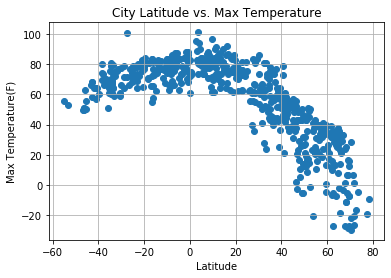

In [52]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

#### Latitude vs. Humidity Plot

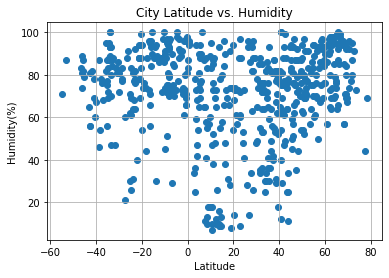

In [53]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

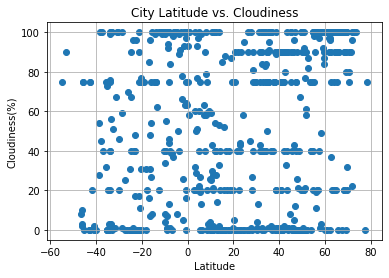

In [54]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

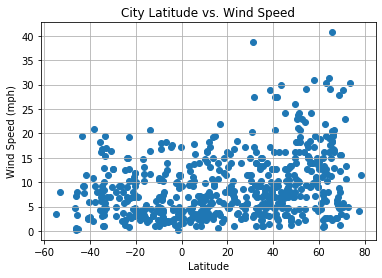

In [55]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

## Linear Regression

In [66]:
# OPTIONAL: Create a function to create Linear Regression plots
def north():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,20),fontsize=15,color="red")
    
def south():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-20,15),fontsize=15,color="red")

In [57]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_df = weather_df[weather_df['Lat'] >= 0]
south_weather_df = weather_df[weather_df['Lat'] <0]


south_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Breves,100,BR,1584051065,96,-1.68,-50.48,77.05,0.29
1,Vila Velha,75,BR,1584051070,88,-20.33,-40.29,78.01,9.17
2,Mahébourg,75,MU,1584051075,94,-20.41,57.70,79.00,3.36
3,Bredasdorp,0,ZA,1584051245,88,-34.53,20.04,66.20,1.12
4,Mataura,10,NZ,1584051356,89,-46.19,168.86,49.33,0.25


In [68]:
north_weather_df.head()

dtype('float64')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

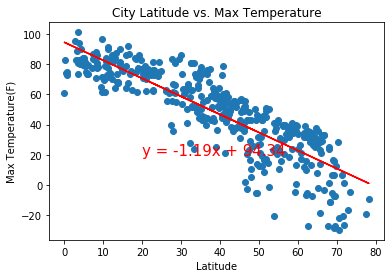

In [59]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Max Temp"]
north()

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

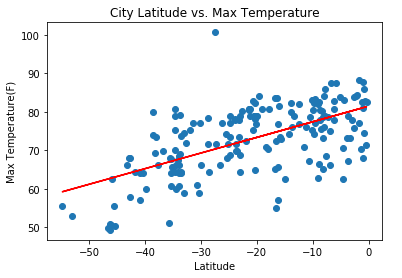

In [60]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Max Temp"]
south()

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

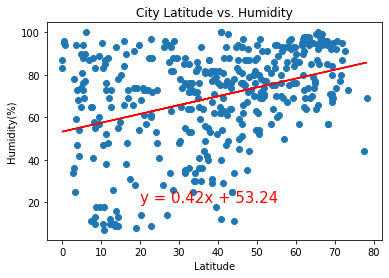

In [61]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Humidity"]
north()

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

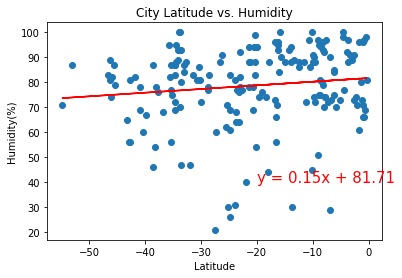

In [62]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Humidity"]
south()

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

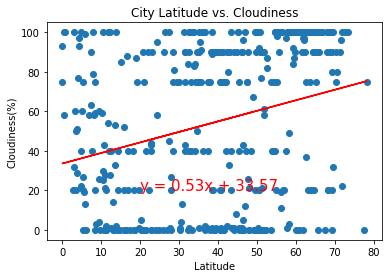

In [63]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Cloudiness"]
north()

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

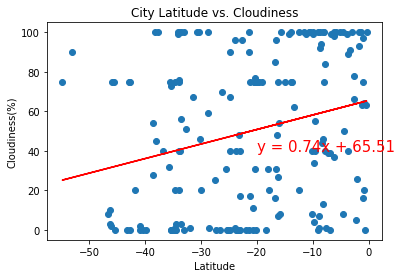

In [64]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Cloudiness"]
south()

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

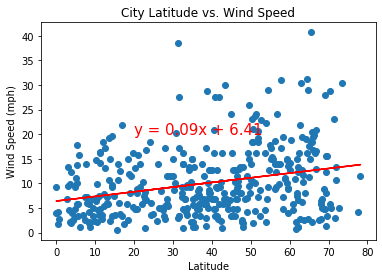

In [49]:
plt.scatter(north_weather_df["Lat"], north_weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
x_values = north_weather_df["Lat"]
y_values = north_weather_df["Wind Speed"]
north()

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

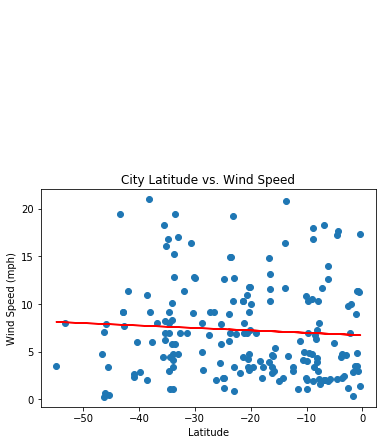

In [65]:
plt.scatter(south_weather_df["Lat"], south_weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
x_values = south_weather_df["Lat"]
y_values = south_weather_df["Wind Speed"]
south()

plt.show()